In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import matplotlib.pyplot as plt

In [3]:
dataset_zip = "plantdisease.zip"

In [5]:
if os.path.exists(dataset_zip):  # Check if ZIP file exists
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall("plant_disease_data")  # Extract into a folder
    print("Dataset extracted successfully!")
else:
    print("ZIP file not found. Please upload 'plantdisease.zip' to the Jupyter home directory.")

# Step 3: Define Dataset Directory
dataset_dir = "plant_disease_data"  # Use extracted folder


Dataset extracted successfully!


In [13]:
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize images
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% data for validation
)

# Training Data
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation Data
val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 33021 images belonging to 1 classes.
Found 8255 images belonging to 1 classes.


In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')  # 3 classes: Healthy, Early Blight, Late Blight
])

Epoch 1/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 676s 654ms/step - accuracy: 0.9964 - loss: 0.0086 - val_accuracy: 0.0000e+00 - val_loss: 466.5936
Epoch 2/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 421s 408ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 466.1482
Epoch 3/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 418s 405ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 466.3989
Epoch 4/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 320s 310ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 466.1125
Epoch 5/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 317s 308ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 466.2841
Epoch 6/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 360s 349ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 466.5035
Epoch 7/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 248s 240ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 466.3

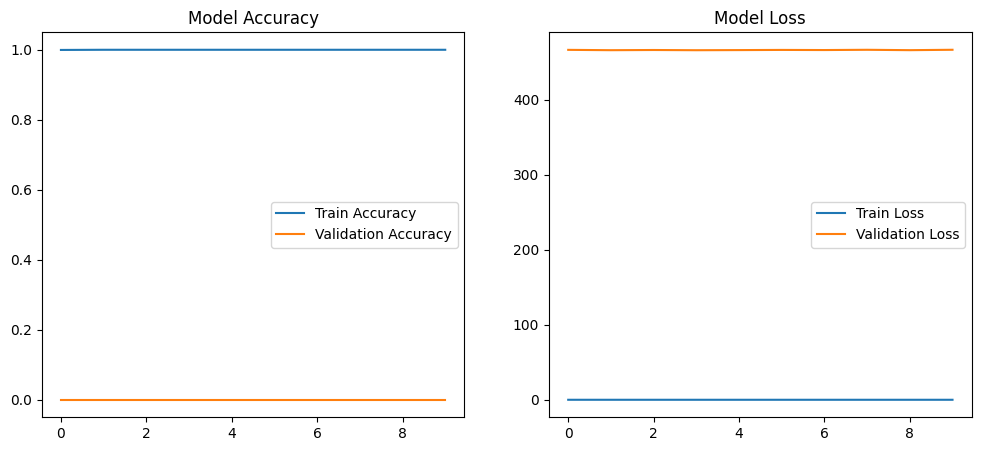

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(val_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 9: Plot Accuracy and Loss Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [20]:
model.save("potato_disease_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [23]:
model.save("potato_disease_model.h5")


In [25]:
import os

file_path = "potato_disease_model.h5"

if os.path.exists(file_path):
    print("Model file exists:", file_path)
else:
    print("Model file not found!")


Model file exists: potato_disease_model.h5
